<a href="https://colab.research.google.com/github/rushikeshlatad/Transport-demand-prediction-Rushikesh-Latad/blob/main/Transport_demand_prediction_(ML_Regression).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###**Project Name -** Transport demand prediction 

*   Project Type - ML Regression
*   Contribution - Individual
*   Member Name - Rushikesh Latad

###**Project Summary -** 

In this project the task was to build a machine learning model to predict the ticket demand prediction of the vehicle according to each ride id which were travelling from 17 diffrent locations and travelling to Nairobi.

In this at first I explored the data and find out insights from the data and plotted them by using amazing visualizations with the help of libraris like matplotlib and seaborn. While doing the exp[loratory data analysis i found out that in the dataset their is no target column which will tell us about the number odf seats booked in each ride id, so i created the target feature by applying group by mehod on ride ids and considerd the nunique seat numbers booked in each ride id. 

Then I preformed rigouros feature engineering on the dataset and created multiple new features by using existing features. which was nescassry for getting good iunsights and better model performance. For building model to get the predictions i have used algorithms like Linear regression, Lasso regression , Ridge egression, Random forest algorithm, Gradient bosting algorithm and Xtreme gradient boosting algorithm. Then i did hyperparameter tunning on all these algorithms. I have used r2 score as ou primary evaluation metric of the model and after observing scores for all the algorithms i observed that by doing hyperparameter tunning on XGBoost algorithym we can get the best r2 score value which was 0.70 and considerd this score as best score and best model anmong all the other models. 

###**GitHub Link -**

###**Problem Statement**

In this project the task was to build a machine learning model to predict the ticket demand prediction of the vehicle according to each ride id which were travelling from 17 diffrent locations and travelling to Nairobi.

# *Lets start*

In [ ]:
#importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
#importing dataset
df = pd.read_csv('/content/drive/MyDrive/Capstone project regression/transport_demand_prediction.csv')

In [ ]:
df.shape

(51645, 10)

In [ ]:
df.head(1)

,ride_id,seat_number,payment_method,payment_receipt,travel_date,travel_time,travel_from,travel_to,car_type,max_capacity
0,1442,15A,Mpesa,UZUEHCBUSO,17-10-17,7:15,Migori,Nairobi,Bus,49


In [ ]:
df.dtypes

ride_id             int64
seat_number        object
payment_method     object
payment_receipt    object
travel_date        object
travel_time        object
travel_from        object
travel_to          object
car_type           object
max_capacity        int64
dtype: object

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51645 entries, 0 to 51644
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   ride_id          51645 non-null  int64 
 1   seat_number      51645 non-null  object
 2   payment_method   51645 non-null  object
 3   payment_receipt  51645 non-null  object
 4   travel_date      51645 non-null  object
 5   travel_time      51645 non-null  object
 6   travel_from      51645 non-null  object
 7   travel_to        51645 non-null  object
 8   car_type         51645 non-null  object
 9   max_capacity     51645 non-null  int64 
dtypes: int64(2), object(8)
memory usage: 3.9+ MB


In [ ]:
df.isnull().sum()

ride_id            0
seat_number        0
payment_method     0
payment_receipt    0
travel_date        0
travel_time        0
travel_from        0
travel_to          0
car_type           0
max_capacity       0
dtype: int64

Hence there is no null values

In [ ]:
df.duplicated().sum()

0

Hence there is no duplicate rows in our dataset.

In [ ]:
df.describe(include='all')

,ride_id,seat_number,payment_method,payment_receipt,travel_date,travel_time,travel_from,travel_to,car_type,max_capacity
count,51645.000000,51645,51645,51645,51645,51645,51645,51645,51645,51645.000000
unique,NaN,61,2,51645,149,78,17,1,2,NaN
top,NaN,1,Mpesa,UZUEHCBUSO,10-12-17,7:09,Kisii,Nairobi,Bus,NaN
freq,NaN,2065,51532,1,856,3926,22607,51645,31985,NaN
mean,10188.645793,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,34.534321
std,2211.295708,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18.451193
min,1442.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.000000
25%,8287.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.000000
50%,10353.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,49.000000
75%,12029.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,49.000000


Understanding from the above describe
*   There are 61 unique seat numbers and seat number 1 occurs the most 2065 times.
*   Passengers have used 2 types of payment methods and Mpesa is used mpost of the time.
*   There are total 149 unique travel dates in our dataset.
*   There are 2 types of cars and most of them are bus.
*   There are 17 places from the passesngers are travelling.









In [ ]:
df.nunique()

ride_id             6249
seat_number           61
payment_method         2
payment_receipt    51645
travel_date          149
travel_time           78
travel_from           17
travel_to              1
car_type               2
max_capacity           2
dtype: int64

Let's explore this data

##Exploratory Data analysis

In [ ]:
df['payment_method'].value_counts()

Mpesa    51532
Cash       113
Name: payment_method, dtype: int64

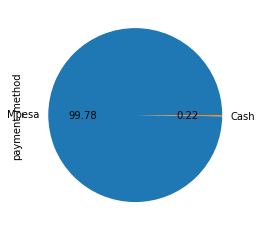

In [ ]:
df['payment_method'].value_counts().plot(kind='pie',autopct='%.2f', textprops={'fontsize': 10})

Here we cam see that only 0.22% payment id done through cash.

In [ ]:
df['travel_from'].value_counts()/len(df)*100

Kisii        43.773841
Migori       13.606351
Homa Bay     12.206409
Sirare        8.614580
Rongo         7.605770
Kehancha      3.696389
Awendo        3.462097
Kijauri       1.996321
Keroka        1.913060
Nyachenge     0.991383
Rodi          0.784200
Mbita         0.731920
Ndhiwa        0.456966
Sori          0.106496
Keumbu        0.042599
Oyugis        0.009681
Kendu Bay     0.001936
Name: travel_from, dtype: float64

Here we can see that over 80% tickets were booked from only five locations out of 17 locations.

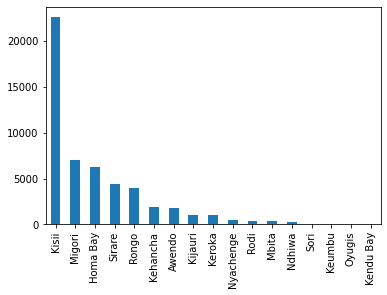

In [ ]:
df['travel_from'].value_counts().plot(kind='bar')    

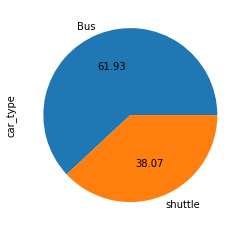

In [ ]:
df['car_type'].value_counts().plot(kind ='pie', autopct='%.2f')

So approxiamtly 62% bus tickets were booked and 38% shuttle car type tickets were booked.

In [ ]:
df['max_capacity'].value_counts()/len(df)*100

49    61.932423
11    38.067577
Name: max_capacity, dtype: float64

Here we can say that the maximum capacity of Bus is 49 and Shutle is 11

As we can see that in our dataset there is no target variable, to create a demand prediction model we need to create the target variable as 'number_of_ticket'.

In [ ]:
t = pd.DataFrame(df.groupby('ride_id')['seat_number'].count().rename('number_of_ticket').reset_index())
t.head() 

,ride_id,number_of_ticket
0,1442,1
1,5437,1
2,5710,1
3,5777,5
4,5778,31


In [ ]:
t.describe().T

,count,mean,std,min,25%,50%,75%,max
ride_id,6249.0,9963.644583,2296.304872,1442.0,7989.0,10024.0,11917.0,20117.0
number_of_ticket,6249.0,8.264522,8.632968,1.0,2.0,7.0,11.0,50.0


Here we can see that the max seat_number count is 50 which is not possible because maximum capacity of bus is 49 and shuttle is 11.

Lets get deeper into it why it is happening

In [ ]:
t.loc[t['number_of_ticket'] == 50]

,ride_id,number_of_ticket
1922,8454,50


In [ ]:
df.loc[df['ride_id']==8454].nunique()

ride_id             1
seat_number        47
payment_method      1
payment_receipt    50
travel_date         1
travel_time         1
travel_from         1
travel_to           1
car_type            1
max_capacity        1
dtype: int64

Here we can see that unique seat_number is 47 but unique payment_receipt is 50 which is error because we know that for every unique seat_number there wil be only one payment receipt is possible(or may be for one seat more than one payments had done thats why more than one payment receipts), and same seat cannot be booked more than one time. So this is the data collection error. This error has happend with other ride ids as well so we have to take care of it.

In [ ]:
print('duplicate seat number for ride id 8454 is : ', df.loc[df['ride_id']==8454]['seat_number'].duplicated().sum())
print('-'*50)
print('duplicate seat number for ride id 5778 is : ', df.loc[df['ride_id']==5778]['seat_number'].duplicated().sum())

duplicate seat number for ride id 8454 is :  3
--------------------------------------------------
duplicate seat number for ride id 5778 is :  1


Hence here we can see that there are 3 duplicate seat_number booked for ride id 8454 and 1 for 5778. this error is happend other ride ids as well. 

In [ ]:
target = pd.DataFrame(df.groupby('ride_id')['seat_number'].nunique().rename('number_of_ticket').reset_index()) #taking nunique instead of count
target.head() 

,ride_id,number_of_ticket
0,1442,1
1,5437,1
2,5710,1
3,5777,5
4,5778,30


In [ ]:
target.shape

(6249, 2)

In [ ]:
df_new = df.drop_duplicates('ride_id')
df_new.shape

(6249, 10)

In [ ]:
df_new = df_new.merge(target,on='ride_id')
df_new.head()

,ride_id,seat_number,payment_method,payment_receipt,travel_date,travel_time,travel_from,travel_to,car_type,max_capacity,number_of_ticket
0,1442,15A,Mpesa,UZUEHCBUSO,17-10-17,7:15,Migori,Nairobi,Bus,49,1
1,5437,14A,Mpesa,TIHLBUSGTE,19-11-17,7:12,Migori,Nairobi,Bus,49,1
2,5710,8B,Mpesa,EQX8Q5G19O,26-11-17,7:05,Keroka,Nairobi,Bus,49,1
3,5777,19A,Mpesa,SGP18CL0ME,27-11-17,7:10,Homa Bay,Nairobi,Bus,49,5
4,5778,11A,Mpesa,BM97HFRGL9,27-11-17,7:12,Migori,Nairobi,Bus,49,30


We can drop columns like seat_number, payment_method, payment_receipt, max_capacity because this does not add any value in predicting no. of tickets



In [ ]:
dff= df_new.drop(['seat_number','payment_method','payment_receipt','max_capacity'], axis=1)

In [ ]:
dff.columns

Index(['ride_id', 'travel_date', 'travel_time', 'travel_from', 'travel_to',
       'car_type', 'number_of_ticket'],
      dtype='object')

In [ ]:
dff.describe().T

,count,mean,std,min,25%,50%,75%,max
ride_id,6249.0,9963.644583,2296.304872,1442.0,7989.0,10024.0,11917.0,20117.0
number_of_ticket,6249.0,8.237478,8.601075,1.0,2.0,7.0,11.0,49.0


In [ ]:
dff.head(1)

,ride_id,travel_date,travel_time,travel_from,travel_to,car_type,number_of_ticket
0,1442,17-10-17,7:15,Migori,Nairobi,Bus,1


We have to do some feature engineering here on travel date and travel time

##Feature Engineering

In [ ]:
dff['travel_date_time'] = dff['travel_date'] + ' ' + dff['travel_time']

In [ ]:
from datetime import datetime
#converting travel_date_time into datetime data type.
dff['travel_date_time'] = pd.to_datetime(dff['travel_date_time'])   
dff.dtypes

ride_id                      int64
travel_date                 object
travel_time                 object
travel_from                 object
travel_to                   object
car_type                    object
number_of_ticket             int64
travel_date_time    datetime64[ns]
dtype: object

In [ ]:
dff['day'] = dff['travel_date_time'].dt.day
dff['month'] = dff['travel_date_time'].dt.month
dff['year'] = dff['travel_date_time'].dt.year
dff['hour'] = dff['travel_date_time'].dt.hour
dff['minute'] = dff['travel_date_time'].dt.minute
dff['quarter'] = dff['travel_date_time'].dt.quarter
dff['dayofweek'] = dff['travel_date_time'].dt.dayofweek
dff["dayofyear"]=dff["travel_date_time"].dt.dayofyear
dff["is_weekend"]=dff["dayofweek"].apply( lambda x : 1 if x  in [5,6] else 0 )  #0 is considerd as monday hence 5 and 6 are weekends
dff.head()

,ride_id,travel_date,travel_time,travel_from,travel_to,car_type,number_of_ticket,travel_date_time,day,month,year,hour,minute,quarter,dayofweek,dayofyear,is_weekend
0,1442,17-10-17,7:15,Migori,Nairobi,Bus,1,2017-10-17 07:15:00,17,10,2017,7,15,4,1,290,0
1,5437,19-11-17,7:12,Migori,Nairobi,Bus,1,2017-11-19 07:12:00,19,11,2017,7,12,4,6,323,1
2,5710,26-11-17,7:05,Keroka,Nairobi,Bus,1,2017-11-26 07:05:00,26,11,2017,7,5,4,6,330,1
3,5777,27-11-17,7:10,Homa Bay,Nairobi,Bus,5,2017-11-27 07:10:00,27,11,2017,7,10,4,0,331,0
4,5778,27-11-17,7:12,Migori,Nairobi,Bus,30,2017-11-27 07:12:00,27,11,2017,7,12,4,0,331,0


we can drop travel_date and travel_time because we had travel_date_time feature.

In [ ]:
dff = dff.drop(['travel_date','travel_time'], axis=1)

###Bivariate analysis

In [ ]:
dff.head(1)

,ride_id,travel_from,travel_to,car_type,number_of_ticket,travel_date_time,day,month,year,hour,minute,quarter,dayofweek,dayofyear,is_weekend
0,1442,Migori,Nairobi,Bus,1,2017-10-17 07:15:00,17,10,2017,7,15,4,1,290,0


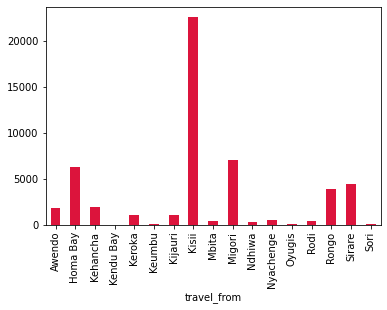

In [ ]:
dff.groupby('travel_from')['number_of_ticket'].sum().plot(kind='bar', color='#dc143c')

From the above plot we can see that maximum people are travelling from Kisii followed by migori, homa bay, rongo and sirare and very few people are travlling from other remaning cities.

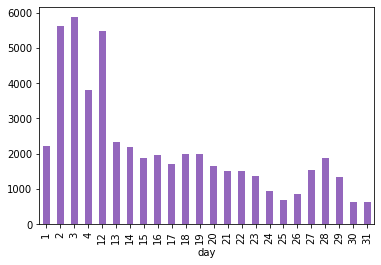

In [ ]:
dff.groupby('day')['number_of_ticket'].sum().plot(kind='bar', color='#9467bd')

colcusions from the above plot
*   maximum ticket bookings were done on 2,3,4,12th day
*   at month ends number of ticket is quite low.
*   we can see that from 5th to 11th day there is no booking may be because of holiday or strike or any other reasons





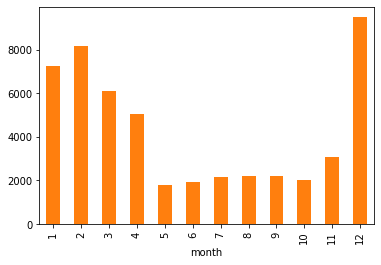

In [ ]:
dff.groupby('month')['number_of_ticket'].sum().plot(kind='bar', color='#ff7f0e')

here we can say that at the start of year i.e. first four month and last month of year no. of bookings is high.

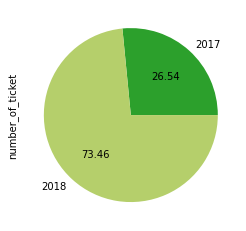

In [ ]:
dff.groupby('year')['number_of_ticket'].sum().plot(kind='pie', colors=['#2ca02c',"#b5cf6b"], autopct='%.2f')

So the bookings in 2018 is approx thrice of bookings in 2017

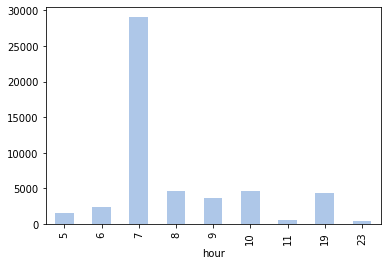

In [ ]:
dff.groupby('hour')['number_of_ticket'].sum().plot(kind='bar', color='#aec7e8')

Most of the bookings were done in early morning hours i.e. before 10 a.m. the reason could be people might be travelling to the nairobi for work.

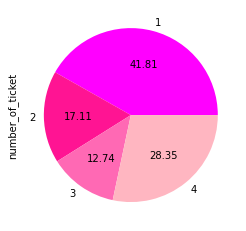

In [ ]:
dff.groupby('quarter')['number_of_ticket'].sum().plot(kind='pie', colors=["#ff00ff", "#ff1493", "#ff69b4",'#ffb6c1'], autopct='%.2f')

here it is clear that approx 70% bookings were done in 1st and 4th quarter and only 30% done in 2nd and 3rd quarter we have seen this in plot of month vs no. of ticket as well.

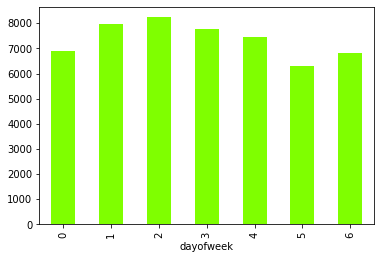

In [ ]:
dff.groupby('dayofweek')['number_of_ticket'].sum().plot(kind='bar', color='#7fff00')

ticket booking on weekdays is higher than weekends

In [ ]:
dff['period'] = np.nan

dff.loc[dff.hour < 7, 'period'] = 'em'
dff.loc[(dff.hour >= 7) & (dff.hour < 11), 'period'] = 'am'
dff.loc[(dff.hour >= 11) & (dff.hour < 15), 'period'] = 'mid'
dff.loc[(dff.hour >= 15) & (dff.hour < 19), 'period'] = 'eve'
dff.loc[(dff.hour >= 19) & (dff.hour <= 24), 'period'] = 'pm'

pcount = dict(dff['period'].value_counts())
pcount

dff['hourly_travelers'] = np.log1p(dff['period'].map(pcount))

dcount = dict(dff["dayofyear"].value_counts())
dff["daily_travelers"] = np.log1p(dff["dayofyear"].map(dcount))
dff.head()

,ride_id,travel_from,travel_to,car_type,number_of_ticket,travel_date_time,day,month,year,hour,minute,quarter,dayofweek,dayofyear,is_weekend,period,hourly_travelers,daily_travelers
0,1442,Migori,Nairobi,Bus,1,2017-10-17 07:15:00,17,10,2017,7,15,4,1,290,0,am,8.494743,0.693147
1,5437,Migori,Nairobi,Bus,1,2017-11-19 07:12:00,19,11,2017,7,12,4,6,323,1,am,8.494743,0.693147
2,5710,Keroka,Nairobi,Bus,1,2017-11-26 07:05:00,26,11,2017,7,5,4,6,330,1,am,8.494743,0.693147
3,5777,Homa Bay,Nairobi,Bus,5,2017-11-27 07:10:00,27,11,2017,7,10,4,0,331,0,am,8.494743,3.871201
4,5778,Migori,Nairobi,Bus,30,2017-11-27 07:12:00,27,11,2017,7,12,4,0,331,0,am,8.494743,3.871201


In [ ]:
dff_new = dff.copy()
dff_new.shape

(6249, 18)

In [ ]:
# Let us find the difference between next and previous buses
# And count the travel per minut trip
def find_difference_bw_bus(data):
  
  data.sort_values(["travel_from","travel_date_time"],inplace=True,ascending=True)
  data["Time_gap_btw_0_1_next_bus"]=(data["travel_date_time"]-data.groupby(["travel_from"]).travel_date_time.shift(-1)).dt.total_seconds()/3600
  data["Time_gap_btw_0_1_previous_bus"]=(data["travel_date_time"]-data.groupby(["travel_from"]).travel_date_time.shift(1)).dt.total_seconds()/3600
  data["Time_gap_btw_0_2_next_bus"]=(data["travel_date_time"]-data.groupby(["travel_from"]).travel_date_time.shift(-2)).dt.total_seconds()/3600
  data["Time_gap_btw_0_2_previous_bus"]=(data["travel_date_time"]-data.groupby(["travel_from"]).travel_date_time.shift(2)).dt.total_seconds()/3600
  data["Time_gap_btw_0_3_next_bus"]=(data["travel_date_time"]-data.groupby(["travel_from"]).travel_date_time.shift(-3)).dt.total_seconds()/3600
  data["Time_gap_btw_0_3_previous_bus"]=(data["travel_date_time"]-data.groupby(["travel_from"]).travel_date_time.shift(3)).dt.total_seconds()/3600
  data["Time_gap_btw_next_previous_bus"]=(data.groupby(["travel_from"]).travel_date_time.shift(-1)-data.groupby(["travel_from"]).travel_date_time.shift(1)).dt.total_seconds()/3600
  cols=["Time_gap_btw_0_1_next_bus", "Time_gap_btw_0_1_previous_bus", "Time_gap_btw_0_2_next_bus","Time_gap_btw_0_2_previous_bus",
      "Time_gap_btw_0_3_next_bus", "Time_gap_btw_0_3_previous_bus",
      "Time_gap_btw_next_previous_bus"]
  data[cols]=data.groupby(["travel_from"])[cols].fillna(method="ffill")
  data[cols]=data.groupby(["travel_from"])[cols].fillna(method="backfill")

  
  return data

In [ ]:
dataaa = find_difference_bw_bus(dff_new)
dataaa.head()

,ride_id,travel_from,travel_to,car_type,number_of_ticket,travel_date_time,day,month,year,hour,...,period,hourly_travelers,daily_travelers,Time_gap_btw_0_1_next_bus,Time_gap_btw_0_1_previous_bus,Time_gap_btw_0_2_next_bus,Time_gap_btw_0_2_previous_bus,Time_gap_btw_0_3_next_bus,Time_gap_btw_0_3_previous_bus,Time_gap_btw_next_previous_bus
502,6654,Awendo,Nairobi,Bus,2,2017-05-12 07:08:00,12,5,2017,7,...,am,8.494743,4.025352,-5688.000000,5688.000000,-5688.066667,5688.066667,-5688.083333,5688.083333,5688.066667
5530,12926,Awendo,Nairobi,Bus,20,2018-01-04 07:08:00,4,1,2018,7,...,am,8.494743,3.526361,-0.066667,5688.000000,-0.083333,5688.066667,-0.866667,5688.083333,5688.066667
5533,12929,Awendo,Nairobi,Bus,2,2018-01-04 07:12:00,4,1,2018,7,...,am,8.494743,3.526361,-0.016667,0.066667,-0.800000,5688.066667,-215.933333,5688.083333,0.083333
5539,12935,Awendo,Nairobi,Bus,9,2018-01-04 07:13:00,4,1,2018,7,...,am,8.494743,3.526361,-0.783333,0.016667,-215.916667,0.083333,-216.033333,5688.083333,0.800000
5528,12924,Awendo,Nairobi,Bus,15,2018-01-04 08:00:00,4,1,2018,8,...,am,8.494743,3.526361,-215.133333,0.783333,-215.250000,0.800000,-239.133333,0.866667,215.916667


In [ ]:
dataaa.isnull().sum()

ride_id                           0
travel_from                       0
travel_to                         0
car_type                          0
number_of_ticket                  0
travel_date_time                  0
day                               0
month                             0
year                              0
hour                              0
minute                            0
quarter                           0
dayofweek                         0
dayofyear                         0
is_weekend                        0
period                            0
hourly_travelers                  0
daily_travelers                   0
Time_gap_btw_0_1_next_bus         1
Time_gap_btw_0_1_previous_bus     1
Time_gap_btw_0_2_next_bus         3
Time_gap_btw_0_2_previous_bus     3
Time_gap_btw_0_3_next_bus         3
Time_gap_btw_0_3_previous_bus     3
Time_gap_btw_next_previous_bus    3
dtype: int64

In [ ]:
dataa_new=dataaa.dropna(axis=0)

In [ ]:
dataa_new.isnull().sum()

ride_id                           0
travel_from                       0
travel_to                         0
car_type                          0
number_of_ticket                  0
travel_date_time                  0
day                               0
month                             0
year                              0
hour                              0
minute                            0
quarter                           0
dayofweek                         0
dayofyear                         0
is_weekend                        0
period                            0
hourly_travelers                  0
daily_travelers                   0
Time_gap_btw_0_1_next_bus         0
Time_gap_btw_0_1_previous_bus     0
Time_gap_btw_0_2_next_bus         0
Time_gap_btw_0_2_previous_bus     0
Time_gap_btw_0_3_next_bus         0
Time_gap_btw_0_3_previous_bus     0
Time_gap_btw_next_previous_bus    0
dtype: int64

In [ ]:
from datetime import datetime
from datetime import timedelta

Now let us find the distance of each origin point from the distination point. I used Nirobi Map to estimate the distance from origin point to destination point.

In [ ]:
distance = {'Migori': 370 , 'Keroka': 280, 'Homa Bay':360, 'Kisii':305.1, 'Keumbu':295, 'Rongo':332,
'Kijauri':271, 'Oyugis':330.6, 'Awendo':351, 'Sirare':392, 'Nyachenge':326, 'Kehancha': 387.7,
'Kendu Bay':347, 'Sori':399, 'Rodi':348, 'Mbita':401, 'Ndhiwa': 371}

dataa_new["travel_from_distance"]=dataa_new.travel_from.map(distance)

<ipython-input-50-787a606a6db0>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataa_new["travel_from_distance"]=dataa_new.travel_from.map(distance)


As we know that the avg time to go to Nairobi from any starting point is 8 hrs.

In [ ]:
time = {'Migori': 7*60+8 , 'Keroka': 5*60, 'Homa Bay':7*60, 'Kisii':5*60+34, 'Keumbu':5*60+20, 'Rongo':6*60+21,
'Kijauri':60*4+50,'Oyugis':5*60+50, 'Awendo':6*60+38, 'Sirare':7*60+30, 'Nyachenge':6*60+10, 'Kehancha':7*60+10,
'Kendu Bay':6*60+10, 'Sori':7*60+30, 'Rodi':6*60+40, 'Mbita':7*60+23, 'Ndhiwa': 7*60}

dataa_new["travel_from_time"]=dataa_new.travel_from.map(time)

<ipython-input-51-4d00cb1bb5be>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataa_new["travel_from_time"]=dataa_new.travel_from.map(time)


In [ ]:
dataa_new["speed"]=dataa_new.travel_from_distance/dataa_new.travel_from_time   # speed is in km/min.

<ipython-input-52-4314e51b9897>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataa_new["speed"]=dataa_new.travel_from_distance/dataa_new.travel_from_time   # speed is in km/min.


In [ ]:
dataa_new.head(1)

,ride_id,travel_from,travel_to,car_type,number_of_ticket,travel_date_time,day,month,year,hour,...,Time_gap_btw_0_1_next_bus,Time_gap_btw_0_1_previous_bus,Time_gap_btw_0_2_next_bus,Time_gap_btw_0_2_previous_bus,Time_gap_btw_0_3_next_bus,Time_gap_btw_0_3_previous_bus,Time_gap_btw_next_previous_bus,travel_from_distance,travel_from_time,speed
502,6654,Awendo,Nairobi,Bus,2,2017-05-12 07:08:00,12,5,2017,7,...,-5688.0,5688.0,-5688.066667,5688.066667,-5688.083333,5688.083333,5688.066667,351.0,398,0.88191


In [ ]:
time = {'Migori': 760+8 , 'Keroka': 560, 'Homa Bay':760, 'Kisii':560+34, 'Keumbu':560+20, 
        'Rongo':660+21, 'Kijauri':604+50,'Oyugis':560+50, 'Awendo':660+38, 'Sirare':760+30, 'Nyachenge':660+10,
        'Kehancha':760+10, 'Kendu Bay':660+10, 'Sori':760+30, 'Rodi':660+40, 'Mbita':760+23, 'Ndhiwa': 7*60} 
for key in time.keys(): time[key]=timedelta( minutes=time[key])

#find the date of traveling from origin
dataa_new["Days_and_time_to_reacch_destination"]=dataa_new.travel_from.map(time)

#find the date of arrival at distination
dataa_new["arrival_date"]=dataa_new.travel_date_time+ dataa_new.Days_and_time_to_reacch_destination
dataa_new["hr_arrived_date"]=dataa_new["arrival_date"].dt.hour 
dataa_new["minute_arrived_date"]=dataa_new["arrival_date"].dt.minute

dataa_new["is_rush_hour"]=0 
dataa_new.loc[dataa_new.hr_arrived_date.between(7,17),"is_rush_hour"]=1

<ipython-input-54-ee8d4e8f5f43>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataa_new["Days_and_time_to_reacch_destination"]=dataa_new.travel_from.map(time)
<ipython-input-54-ee8d4e8f5f43>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataa_new["arrival_date"]=dataa_new.travel_date_time+ dataa_new.Days_and_time_to_reacch_destination
<ipython-input-54-ee8d4e8f5f43>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] 

In [ ]:
dataa_new.head()

,ride_id,travel_from,travel_to,car_type,number_of_ticket,travel_date_time,day,month,year,hour,...,Time_gap_btw_0_3_previous_bus,Time_gap_btw_next_previous_bus,travel_from_distance,travel_from_time,speed,Days_and_time_to_reacch_destination,arrival_date,hr_arrived_date,minute_arrived_date,is_rush_hour
502,6654,Awendo,Nairobi,Bus,2,2017-05-12 07:08:00,12,5,2017,7,...,5688.083333,5688.066667,351.0,398,0.88191,0 days 11:38:00,2017-05-12 18:46:00,18,46,0
5530,12926,Awendo,Nairobi,Bus,20,2018-01-04 07:08:00,4,1,2018,7,...,5688.083333,5688.066667,351.0,398,0.88191,0 days 11:38:00,2018-01-04 18:46:00,18,46,0
5533,12929,Awendo,Nairobi,Bus,2,2018-01-04 07:12:00,4,1,2018,7,...,5688.083333,0.083333,351.0,398,0.88191,0 days 11:38:00,2018-01-04 18:50:00,18,50,0
5539,12935,Awendo,Nairobi,Bus,9,2018-01-04 07:13:00,4,1,2018,7,...,5688.083333,0.800000,351.0,398,0.88191,0 days 11:38:00,2018-01-04 18:51:00,18,51,0
5528,12924,Awendo,Nairobi,Bus,15,2018-01-04 08:00:00,4,1,2018,8,...,0.866667,215.916667,351.0,398,0.88191,0 days 11:38:00,2018-01-04 19:38:00,19,38,0


In [ ]:
dataa_new.shape

(6246, 33)

###Encoding

In [ ]:
from sklearn import preprocessing
dataa_neew = pd.get_dummies(dataa_new, columns=['travel_from'])
label_enc = {'Bus':1,'shuttle':0}
dataa_neew.replace(label_enc,inplace=True)

In [ ]:
dataa_neew.head(1)

,ride_id,travel_to,car_type,number_of_ticket,travel_date_time,day,month,year,hour,minute,...,travel_from_Kijauri,travel_from_Kisii,travel_from_Mbita,travel_from_Migori,travel_from_Ndhiwa,travel_from_Nyachenge,travel_from_Rodi,travel_from_Rongo,travel_from_Sirare,travel_from_Sori
502,6654,Nairobi,1,2,2017-05-12 07:08:00,12,5,2017,7,8,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
dataa_neew.columns

Index(['ride_id', 'travel_to', 'car_type', 'number_of_ticket',
       'travel_date_time', 'day', 'month', 'year', 'hour', 'minute', 'quarter',
       'dayofweek', 'dayofyear', 'is_weekend', 'period', 'hourly_travelers',
       'daily_travelers', 'Time_gap_btw_0_1_next_bus',
       'Time_gap_btw_0_1_previous_bus', 'Time_gap_btw_0_2_next_bus',
       'Time_gap_btw_0_2_previous_bus', 'Time_gap_btw_0_3_next_bus',
       'Time_gap_btw_0_3_previous_bus', 'Time_gap_btw_next_previous_bus',
       'travel_from_distance', 'travel_from_time', 'speed',
       'Days_and_time_to_reacch_destination', 'arrival_date',
       'hr_arrived_date', 'minute_arrived_date', 'is_rush_hour',
       'travel_from_Awendo', 'travel_from_Homa Bay', 'travel_from_Kehancha',
       'travel_from_Keroka', 'travel_from_Keumbu', 'travel_from_Kijauri',
       'travel_from_Kisii', 'travel_from_Mbita', 'travel_from_Migori',
       'travel_from_Ndhiwa', 'travel_from_Nyachenge', 'travel_from_Rodi',
       'travel_from_Rongo', 't

Before traing the model we have to drop few features.

In [ ]:
features = dataa_neew.drop(['travel_to','ride_id','travel_date_time','period','Days_and_time_to_reacch_destination','arrival_date'], axis=1)

In [ ]:
features.head(1)

,car_type,number_of_ticket,day,month,year,hour,minute,quarter,dayofweek,dayofyear,...,travel_from_Kijauri,travel_from_Kisii,travel_from_Mbita,travel_from_Migori,travel_from_Ndhiwa,travel_from_Nyachenge,travel_from_Rodi,travel_from_Rongo,travel_from_Sirare,travel_from_Sori
502,1,2,12,5,2017,7,8,2,4,132,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
from sklearn.model_selection import train_test_split
X = features.drop(['number_of_ticket'], axis=1)
y= features['number_of_ticket']
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=42)

In [ ]:
X.head(1)

,car_type,day,month,year,hour,minute,quarter,dayofweek,dayofyear,is_weekend,...,travel_from_Kijauri,travel_from_Kisii,travel_from_Mbita,travel_from_Migori,travel_from_Ndhiwa,travel_from_Nyachenge,travel_from_Rodi,travel_from_Rongo,travel_from_Sirare,travel_from_Sori
502,1,12,5,2017,7,8,2,4,132,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
y.head(1)

502    2
Name: number_of_ticket, dtype: int64

###Implementing Linear regression

In [ ]:
from sklearn.linear_model import LinearRegression
lir = LinearRegression()
lir.fit(X_train, y_train)
# Predicting 
y_pred = lir.predict(X_test)

In [ ]:
train_score = lir.score(X_train, y_train)
test_score = lir.score(X_test,y_test)
y_train_pred = lir.predict(X_train)
print('train score is:', train_score)
print('test score is:', test_score)

train score is: 0.417586391537935
test score is: 0.4045368197248552


In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error,r2_score
import math
def print_metrics(actual, predicted):
  print('MSE is {}'.format(mean_squared_error(actual, predicted)))
  print('RMSE is {}'.format(math.sqrt(mean_squared_error(actual, predicted))))
  print('r2_score is {}'.format(r2_score(actual, predicted)))
  print('MAE is {}'.format(mean_absolute_error(actual, predicted)))
  print('MAPE is {}'.format(np.mean(np.abs((actual - predicted) / actual)) * 100))

In [ ]:
print_metrics(y_test, y_pred)

MSE is 49.70146943739773
RMSE is 7.049926910074865
r2_score is 0.4045368197248552
MAE is 4.846680990624397
MAPE is 166.82219528212124


Here we can see that the metrics score that we got after traing and prediction is not very good, so we have see other ml model as well.

###Lasso Regression

In [ ]:
from sklearn.linear_model import Lasso

In [ ]:
alphas = [0.001,0.01,0.015,0.025,0.5,0.75,1]
for alpha in alphas:
  lasso  = Lasso(alpha=alpha , max_iter= 5000)
  lasso.fit(X_train, y_train)
  print('alpha: ',alpha)
  print('test Score: ',lasso.score(X_test, y_test))
  print('train Score: ',lasso.score(X_train, y_train))

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.776e+03, tolerance: 3.576e+01
  model = cd_fast.enet_coordinate_descent(


alpha:  0.001
test Score:  0.4043886672708169
train Score:  0.4175584773661293


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.328e+04, tolerance: 3.576e+01
  model = cd_fast.enet_coordinate_descent(


alpha:  0.01
test Score:  0.40142471271043334
train Score:  0.4158687686648206


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.272e+03, tolerance: 3.576e+01
  model = cd_fast.enet_coordinate_descent(


alpha:  0.015
test Score:  0.39906791726077917
train Score:  0.4139845090446673
alpha:  0.025
test Score:  0.39578079598197713
train Score:  0.4100363964037679
alpha:  0.5
test Score:  0.2940457198841687
train Score:  0.28154829179868424
alpha:  0.75
test Score:  0.2855926261440854
train Score:  0.2709243888138222
alpha:  1
test Score:  0.28488972401531276
train Score:  0.2700390530690365


Here we can see that at alpha value = 0.001 the test score is highest, so we will take alpha 0.001

In [ ]:
lasso  = Lasso(alpha=0.001 , max_iter= 5000)
lasso.fit(X_train, y_train)

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.776e+03, tolerance: 3.576e+01
  model = cd_fast.enet_coordinate_descent(


Lasso(alpha=0.001, max_iter=5000)

In [ ]:
y_pred_on_lasso = lasso.predict(X_test)
print_metrics(y_test, y_pred_on_lasso)

MSE is 49.713835264388166
RMSE is 7.050803873629458
r2_score is 0.4043886672708169
MAE is 4.84759102291965
MAPE is 166.81658855365566


Ridge Regression

In [ ]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

In [ ]:
ridge = Ridge()
parameters = {'alpha': [1e-15,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1,5,10,20,30,40,45,50,55,60,100]}
ridge_regressor = GridSearchCV(ridge, parameters, scoring='neg_mean_squared_error', cv=3)
ridge_regressor.fit(X_train,y_train)

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_ridge.py:157: LinAlgWarning: Ill-conditioned matrix (rcond=4.59632e-20): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_ridge.py:157: LinAlgWarning: Ill-conditioned matrix (rcond=7.80654e-20): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_ridge.py:157: LinAlgWarning: Ill-conditioned matrix (rcond=5.81863e-20): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_ridge.py:157: LinAlgWarning: Ill-conditioned matrix (rcond=5.04255e-18): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_ridge.py:157: LinAlgWarning: Ill-condit

GridSearchCV(cv=3, estimator=Ridge(),
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 1e-05, 0.0001, 0.001,
                                   0.01, 1, 5, 10, 20, 30, 40, 45, 50, 55, 60,
                                   100]},
             scoring='neg_mean_squared_error')

In [ ]:
print("The best fit alpha value is found out to be :" ,ridge_regressor.best_params_)
print("\nUsing ",ridge_regressor.best_params_, " the negative mean squared error is: ", ridge_regressor.best_score_)

The best fit alpha value is found out to be : {'alpha': 5}

Using  {'alpha': 5}  the negative mean squared error is:  -42.76155128579351


In [ ]:
y_pred_ridge = ridge_regressor.predict(X_test)
print(ridge_regressor.score(X_train,y_train))
print(ridge_regressor.score(X_test,y_test))

-41.732541390296994
-49.801716865740126


In [ ]:
print_metrics(y_test, y_pred_ridge)

MSE is 49.801716865740126
RMSE is 7.0570331489755755
r2_score is 0.4033357757080308
MAE is 4.850334346692665
MAPE is 166.8539099973638


Gradient Boosting Regressor

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
reg = GradientBoostingRegressor(random_state=0)
reg.fit(X_train, y_train)
# Predicting 
y_pred_gb = reg.predict(X_test)
y_pred_train_gb=reg.predict(X_train)

In [ ]:
print(reg.score(X_train,y_train))
print(reg.score(X_test,y_test))

0.6885630144369593
0.6473663694657924


In [ ]:
print_metrics(y_test, y_pred_gb)

MSE is 29.43323817686951
RMSE is 5.4252408404484225
r2_score is 0.6473663694657924
MAE is 3.5513736393339417
MAPE is 111.4166398957151


Here we can see that the metrics score values are better than the linear regression lasso rigression and reidge regression models.

In [ ]:
adj_r2=1-(1-r2_score(y_test, y_pred_gb))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1))
print('adj_r2 score value is :', adj_r2)

adj_r2 score value is : 0.6356994172562238


Lets perform hyperparameter tunning on gradientboosting

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
parameters = {'learning_rate': [1e-5,1e-4,1e-3,1e-2,1,10], 'n_estimators': [100,200,500,750], 'max_depth':[3, 5, 7,9,12], 'random_state':[42]}
RSclassifierr = RandomizedSearchCV(reg, param_distributions = parameters, cv=3)
RSclassifierr.fit(X_train, y_train)

RandomizedSearchCV(cv=3, estimator=GradientBoostingRegressor(random_state=0),
                   param_distributions={'learning_rate': [1e-05, 0.0001, 0.001,
                                                          0.01, 1, 10],
                                        'max_depth': [3, 5, 7, 9, 12],
                                        'n_estimators': [100, 200, 500, 750],
                                        'random_state': [42]})

In [ ]:
best_values = RSclassifierr.best_params_

In [ ]:
gbclassifierr = GradientBoostingRegressor(max_depth=best_values['max_depth'],n_estimators=best_values['n_estimators'], 
                                          learning_rate=best_values['learning_rate'],random_state=42) 

gbclassifierr.fit(X_train, y_train)

GradientBoostingRegressor(learning_rate=0.01, max_depth=12, n_estimators=500,
                          random_state=42)

In [ ]:
y_pred_gbc = gbclassifierr.predict(X_test)
print_metrics(y_test, y_pred_gbc)

MSE is 31.259862297644606
RMSE is 5.591051984881253
r2_score is 0.6254819579899096
MAE is 3.3389411979423413
MAPE is 93.59374601437189


In [ ]:
adj_r2=1-(1-r2_score(y_test, y_pred_gbc))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1))
print('adj_r2 score value is :', adj_r2)

adj_r2 score value is : 0.6130909557728677


Here we can see that after doing hyperparameter tunning the r2 score and adj r2 score value has increased little bit, but this scores are not sufficent.

Implementing XGBoosting

In [ ]:
import xgboost as xgb
xgbreg= xgb.XGBRegressor()
xgbreg.fit(X_train, y_train)
# Predicting 
y_pred_xgb = xgbreg.predict(X_test)
print_metrics(y_test, y_pred_xgb)

[07:17:49] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
MSE is 29.87646736667332
RMSE is 5.465937007199527
r2_score is 0.6420561308362527
MAE is 3.5781458320856094
MAPE is 112.3988659973902


In [ ]:
train_score = xgbreg.score(X_train, y_train)
test_score = xgbreg.score(X_test,y_test)
print(f'Train score: {train_score}')
print(f'Test score: {test_score}')

Train score: 0.6837822728604512
Test score: 0.6420561308362527


Now lets do some hyperparameter tunning

In [ ]:
from pandas.core.common import random_state
params = {'n_estimators': [50,55,100,200,150], "min_child_weight":[10,20,25,30], 
            'eta': [0.004,0.04,4,40], 
            'colsample_bytree':[0.7], 
            'max_depth': [4,7,8,9,11], 'random_state':[42]}
xgbreg= xgb.XGBRegressor()
xgbreg_rs = RandomizedSearchCV(xgbreg,param_distributions=params, cv=3)
xgbreg_rs.fit(X_train,y_train)

[07:17:50] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[07:17:52] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[07:17:54] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[07:17:57] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[07:17:59] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[07:18:01] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[07:18:02] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[07:18:03] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

RandomizedSearchCV(cv=3, estimator=XGBRegressor(),
                   param_distributions={'colsample_bytree': [0.7],
                                        'eta': [0.004, 0.04, 4, 40],
                                        'max_depth': [4, 7, 8, 9, 11],
                                        'min_child_weight': [10, 20, 25, 30],
                                        'n_estimators': [50, 55, 100, 200, 150],
                                        'random_state': [42]})

In [ ]:
best_valuess = xgbreg_rs.best_params_

In [ ]:
xgbregressor = xgb.XGBRegressor(n_estimators = best_values['n_estimators'],min_child_weight=best_valuess['min_child_weight'],max_depth=best_valuess['max_depth'], eta=best_valuess['eta'],
                                          colsample_bytree=best_valuess['colsample_bytree'], random_state=42) 

xgbregressor.fit(X_train, y_train)

[07:18:28] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(colsample_bytree=0.7, eta=0.04, max_depth=7, min_child_weight=10,
             n_estimators=500, random_state=42)

In [ ]:
y_pred_xgbr = xgbregressor.predict(X_test)
print_metrics(y_test, y_pred_xgbr)

MSE is 28.59437737495436
RMSE is 5.347371071372769
r2_score is 0.6574165898429931
MAE is 3.3431312478780746
MAPE is 97.93988332569538


In [ ]:
y_pred_xgbr_train = xgbregressor.predict(X_train)
print_metrics(y_train, y_pred_xgbr_train)

MSE is 2.6978315638000896
RMSE is 1.6425077058571413
r2_score is 0.9623087360644075
MAE is 1.1146369855567586
MAPE is 31.064156862453235


In [ ]:
dreg= xgb.XGBRegressor(
                        booster= 'gbtree',
                        colsample_bylevel= 1,
                        colsample_bynode= 1,
                        colsample_bytree= 0.7,
                        eta= 0.004,
                        gamma= 0,
                        importance_type= 'gain',
                        learning_rate= 0.1,
                        max_delta_step= 0,
                        max_depth= 8,
                        min_child_weight= 10,
                        n_estimators= 50,
                        n_jobs= 1,
                        objective= 'reg:linear',
                        random_state= 0,
                        reg_alpha= 0,
                        reg_lambda= 1,
                        scale_pos_weight= 1,
                        subsample= 1,
                        verbosity= 1)
dreg.fit(X_train, y_train)
y_pred_train_xgb=dreg.predict(X_train)
y_pred_xgb_test = dreg.predict(X_test)

[07:18:33] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [ ]:
print_metrics(y_test, y_pred_xgb_test)   #best scored

MSE is 24.97745552119512
RMSE is 4.997745043636692
r2_score is 0.7007501937429529
MAE is 3.1517520488500597
MAPE is 90.51547003023333


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


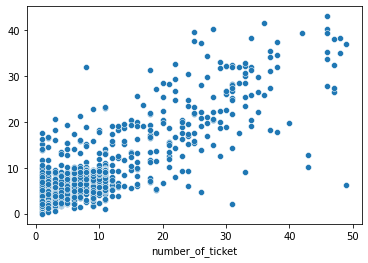

In [ ]:
sns.scatterplot(y_test, y_pred_xgb_test)

Here we can colclude that this is our best model with r2 score of 0.70.